# Global Oilseed Supply from 2012-2022

This data was pulled from the United States Department of Agriculture Foreign Agriculture Service (USDA FSA) Production, Supply and Distribution (PSD) online database using the custom query to create an Excel document that was then converted to a CSV file. This data can be found at the USAID FSA PSD at https://apps.fas.usda.gov/psdonline/app/index.html#/app/home.

In [30]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

%matplotlib inline

Reading the CSV file and printing it shows that there are over 5000 rows and 9 columns for the 10 years.

In [31]:
df = pd.read_csv("global_oilseed_2012-2022.csv")
df

,Attribute,Year,Country,"Oilseed, Peanut","Oilseed, Rapeseed","Oilseed, Soybean","Oilseed, Soybean (Local)","Oilseed, Sunflowerseed",Unit Description
0,Beginning Stocks,2012/2013,Argentina,269,0,14338,2679,369,(1000 MT)
1,Beginning Stocks,2012/2013,Australia,0,572,3,0,0,(1000 MT)
2,Beginning Stocks,2012/2013,Bangladesh,0,152,30,0,0,(1000 MT)
3,Beginning Stocks,2012/2013,Barbados,0,0,5,0,0,(1000 MT)
4,Beginning Stocks,2012/2013,Belarus,0,0,0,0,0,(1000 MT)
...,...,...,...,...,...,...,...,...,...
5551,Ending Stocks,2022/2023,Uzbekistan,0,0,3,0,19,(1000 MT)
5552,Ending Stocks,2022/2023,Venezuela,0,0,2,0,0,(1000 MT)
5553,Ending Stocks,2022/2023,Vietnam,39,0,392,0,0,(1000 MT)
5554,Ending Stocks,2022/2023,Zambia,8,0,32,0,0,(1000 MT)


Since every oilseed crop is in 1000 metric tons (MT) then this column can be dropped

In [32]:
df = df.drop(columns="Unit Description")
df.head()

,Attribute,Year,Country,"Oilseed, Peanut","Oilseed, Rapeseed","Oilseed, Soybean","Oilseed, Soybean (Local)","Oilseed, Sunflowerseed"
0,Beginning Stocks,2012/2013,Argentina,269,0,14338,2679,369
1,Beginning Stocks,2012/2013,Australia,0,572,3,0,0
2,Beginning Stocks,2012/2013,Bangladesh,0,152,30,0,0
3,Beginning Stocks,2012/2013,Barbados,0,0,5,0,0
4,Beginning Stocks,2012/2013,Belarus,0,0,0,0,0


Next we can look at the number of unique values in each column using the nunique function. This shows that there are 6 attributes and 85 countries represented in the dataset, while soybeans are the most frequently used oilseed in the dataset. 

In [33]:
unique_values = df.nunique(0)
unique_values

Attribute                      6
Year                          11
Country                       85
Oilseed, Peanut              667
Oilseed, Rapeseed            621
Oilseed, Soybean            1169
Oilseed, Soybean (Local)     111
Oilseed, Sunflowerseed       514
dtype: int64

Next we should check to see what data types we have before manipulating the data. Apparently everything is in "object" data type, which means it is in string/text type. To use the data properly we need to convert the years to date time and the oilseeds to integers.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attribute                 5556 non-null   object
 1   Year                      5556 non-null   object
 2   Country                   5556 non-null   object
 3   Oilseed, Peanut           5556 non-null   int64 
 4   Oilseed, Rapeseed         5556 non-null   int64 
 5   Oilseed, Soybean          5556 non-null   int64 
 6   Oilseed, Soybean (Local)  5556 non-null   int64 
 7   Oilseed, Sunflowerseed    5556 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 347.4+ KB


Next we need to clean up the Year column so that it is more readable for analysis, instead of being a string value we'll convert it to a date/time data type. To do this we'll remove the "/" and just use the year that the growing season starts as our year. As stated in USDA PSD FAQ's the years are marketing years, except for in the Southern Hemisphere where the second year is the marketing year. Instead of dividing everything by Northern and Southern we're just going to use the first years for everything, our analysis doesn't need to be so precise to follow the growing seasons so closely. 

In [35]:
df[["Year", "Year2"]] = df["Year"].str.split("/", expand=True)
df.head()

,Attribute,Year,Country,"Oilseed, Peanut","Oilseed, Rapeseed","Oilseed, Soybean","Oilseed, Soybean (Local)","Oilseed, Sunflowerseed",Year2
0,Beginning Stocks,2012,Argentina,269,0,14338,2679,369,2013
1,Beginning Stocks,2012,Australia,0,572,3,0,0,2013
2,Beginning Stocks,2012,Bangladesh,0,152,30,0,0,2013
3,Beginning Stocks,2012,Barbados,0,0,5,0,0,2013
4,Beginning Stocks,2012,Belarus,0,0,0,0,0,2013


In [36]:
df = df.drop(columns="Year2")
df.head()

,Attribute,Year,Country,"Oilseed, Peanut","Oilseed, Rapeseed","Oilseed, Soybean","Oilseed, Soybean (Local)","Oilseed, Sunflowerseed"
0,Beginning Stocks,2012,Argentina,269,0,14338,2679,369
1,Beginning Stocks,2012,Australia,0,572,3,0,0
2,Beginning Stocks,2012,Bangladesh,0,152,30,0,0
3,Beginning Stocks,2012,Barbados,0,0,5,0,0
4,Beginning Stocks,2012,Belarus,0,0,0,0,0


In [37]:
df["Year"] = pd.to_datetime(df["Year"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5556 entries, 0 to 5555
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Attribute                 5556 non-null   object        
 1   Year                      5556 non-null   datetime64[ns]
 2   Country                   5556 non-null   object        
 3   Oilseed, Peanut           5556 non-null   int64         
 4   Oilseed, Rapeseed         5556 non-null   int64         
 5   Oilseed, Soybean          5556 non-null   int64         
 6   Oilseed, Soybean (Local)  5556 non-null   int64         
 7   Oilseed, Sunflowerseed    5556 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 347.4+ KB


We can also make the data easier to manipulate by renaming the top columns. We know that they are all oilseeds, so we can remove that part. It is also easier to just put "Soybean(Local)" as "Local Soybeans" it does remove some special characters and makes it easier for our autocomplete to catch without us having to type out "Soybean" all the way.

In [38]:
df = df.rename(columns={"Oilseed, Peanut":"Peanut", "Oilseed, Rapeseed":"Rapeseed", "Oilseed, Soybean":"Soybean", 
    "Oilseed, Soybean (Local)": "Local Soybean", "Oilseed, Sunflowerseed":"Sunflowerseed"})

df.head()

,Attribute,Year,Country,Peanut,Rapeseed,Soybean,Local Soybean,Sunflowerseed
0,Beginning Stocks,2012-01-01,Argentina,269,0,14338,2679,369
1,Beginning Stocks,2012-01-01,Australia,0,572,3,0,0
2,Beginning Stocks,2012-01-01,Bangladesh,0,152,30,0,0
3,Beginning Stocks,2012-01-01,Barbados,0,0,5,0,0
4,Beginning Stocks,2012-01-01,Belarus,0,0,0,0,0


In [39]:
country_df = df.groupby(by=["Country", "Attribute"])
country_df.first()

Year  Peanut  Rapeseed  Soybean  \
Country  Attribute                                                    
Algeria  Beginning Stocks     2015-01-01       0         0        0   
         Domestic Consumption 2015-01-01       0         0        0   
         Ending Stocks        2015-01-01       0         0        0   
         Exports              2015-01-01       0         0        0   
         Imports              2015-01-01       0         0        0   
...                                  ...     ...       ...      ...   
Zimbabwe Domestic Consumption 2012-01-01      70         0       67   
         Ending Stocks        2012-01-01       3         0       10   
         Exports              2012-01-01       2         0        0   
         Imports              2012-01-01       3         0        0   
         Production           2012-01-01      72         0       77   

                               Local Soybean  Sunflowerseed  
Country  Attribute                                           
Algeria  Beginning Stocks                  0              0  
         Domestic Consumption              0              0  
         Ending Stocks                     0              0  
         Exports                           0              0  
         Imports                           0              0  
...                                      ...            ...  
Zimbabwe Domestic Consumption              0              0  
         Ending Stocks                     0              0  
         Exports                           0              0  
         Imports                           0              0  
         Production                        0              0  

[510 rows x 6 columns]

In [40]:
country_df.sum()

C:\Users\kennn\AppData\Local\Temp\ipykernel_20756\1212949809.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_df.sum()


Peanut  Rapeseed  Soybean  Local Soybean  \
Country  Attribute                                                        
Algeria  Beginning Stocks           0         0      470              0   
         Domestic Consumption       0         0     4250              0   
         Ending Stocks              0         0      601              0   
         Exports                    0         0        0              0   
         Imports                    0         0     4381              0   
...                               ...       ...      ...            ...   
Zimbabwe Domestic Consumption    1095         0      791              0   
         Ending Stocks             69         0       80              0   
         Exports                   22         0        0              0   
         Imports                   33         0      144              0   
         Production              1088         0      654              0   

                               Sunflowerseed  
Country  Attribute                            
Algeria  Beginning Stocks                  0  
         Domestic Consumption              0  
         Ending Stocks                     0  
         Exports                           0  
         Imports                           0  
...                                      ...  
Zimbabwe Domestic Consumption              0  
         Ending Stocks                     0  
         Exports                           0  
         Imports                           0  
         Production                        0  

[510 rows x 5 columns]

In [41]:
country_df.mean()

C:\Users\kennn\AppData\Local\Temp\ipykernel_20756\2979910485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  country_df.mean()


Peanut  Rapeseed     Soybean  Local Soybean  \
Country  Attribute                                                              
Algeria  Beginning Stocks       0.000000       0.0   58.750000            0.0   
         Domestic Consumption   0.000000       0.0  531.250000            0.0   
         Ending Stocks          0.000000       0.0   75.125000            0.0   
         Exports                0.000000       0.0    0.000000            0.0   
         Imports                0.000000       0.0  547.625000            0.0   
...                                  ...       ...         ...            ...   
Zimbabwe Domestic Consumption  99.545455       0.0   71.909091            0.0   
         Ending Stocks          6.272727       0.0    7.272727            0.0   
         Exports                2.000000       0.0    0.000000            0.0   
         Imports                3.000000       0.0   13.090909            0.0   
         Production            98.909091       0.0   59.454545            0.0   

                               Sunflowerseed  
Country  Attribute                            
Algeria  Beginning Stocks                0.0  
         Domestic Consumption            0.0  
         Ending Stocks                   0.0  
         Exports                         0.0  
         Imports                         0.0  
...                                      ...  
Zimbabwe Domestic Consumption            0.0  
         Ending Stocks                   0.0  
         Exports                         0.0  
         Imports                         0.0  
         Production                      0.0  

[510 rows x 5 columns]

In [42]:
attributes_df = country_df = df.groupby(by=["Attribute", "Country"])
attributes_df.first()

Year  Peanut  Rapeseed  Soybean  \
Attribute        Country                                            
Beginning Stocks Algeria    2015-01-01       0         0        0   
                 Argentina  2012-01-01     269         0    14338   
                 Australia  2012-01-01       0       572        3   
                 Bangladesh 2012-01-01       0       152       30   
                 Barbados   2012-01-01       0         0        5   
...                                ...     ...       ...      ...   
Production       Uzbekistan 2012-01-01       0         0        0   
                 Venezuela  2012-01-01       0         0       74   
                 Vietnam    2012-01-01     468         0      174   
                 Zambia     2012-01-01     113         0      203   
                 Zimbabwe   2012-01-01      72         0       77   

                             Local Soybean  Sunflowerseed  
Attribute        Country                                   
Beginning Stocks Algeria                 0              0  
                 Argentina            2679            369  
                 Australia               0              0  
                 Bangladesh              0              0  
                 Barbados                0              0  
...                                    ...            ...  
Production       Uzbekistan              0             36  
                 Venezuela               0              0  
                 Vietnam                 0              0  
                 Zambia                  0              0  
                 Zimbabwe                0              0  

[510 rows x 6 columns]

In [43]:
attributes_df.mean()

C:\Users\kennn\AppData\Local\Temp\ipykernel_20756\1683174464.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  attributes_df.mean()


Peanut    Rapeseed       Soybean  \
Attribute        Country                                            
Beginning Stocks Algeria       0.000000    0.000000     58.750000   
                 Argentina   399.818182    8.272727  23819.181818   
                 Australia     6.363636  635.090909      1.909091   
                 Bangladesh    0.000000   62.454545    142.727273   
                 Barbados      0.000000    0.000000      3.181818   
...                                 ...         ...           ...   
Production       Uzbekistan    0.000000    0.000000      5.272727   
                 Venezuela     0.000000    0.000000     74.909091   
                 Vietnam     435.727273    0.909091    102.181818   
                 Zambia      143.727273    0.000000    299.090909   
                 Zimbabwe     98.909091    0.000000     59.454545   

                             Local Soybean  Sunflowerseed  
Attribute        Country                                   
Beginning Stocks Algeria          0.000000       0.000000  
                 Argentina     7598.272727     837.727273  
                 Australia        0.000000       1.000000  
                 Bangladesh       0.000000       0.000000  
                 Barbados         0.000000       0.000000  
...                                    ...            ...  
Production       Uzbekistan       0.000000      39.545455  
                 Venezuela        0.000000       0.000000  
                 Vietnam          0.000000       0.000000  
                 Zambia           0.000000       0.000000  
                 Zimbabwe         0.000000       0.000000  

[510 rows x 5 columns]

In [44]:
country_name = "United States"
attribute_name = "Production"

filtered_df = df.loc[(df["Country"] == country_name) & (df["Attribute"] == attribute_name)]
filtered_df.head()

,Attribute,Year,Country,Peanut,Rapeseed,Soybean,Local Soybean,Sunflowerseed
1001,Production,2012-01-01,United States,3064,1087,82791,0,1241
1083,Production,2013-01-01,United States,1893,1000,91363,0,917
1166,Production,2014-01-01,United States,2354,1138,106905,0,1004
1250,Production,2015-01-01,United States,2722,1305,106869,0,1327
1335,Production,2016-01-01,United States,2532,1405,116931,0,1203


<AxesSubplot:xlabel='Year'>

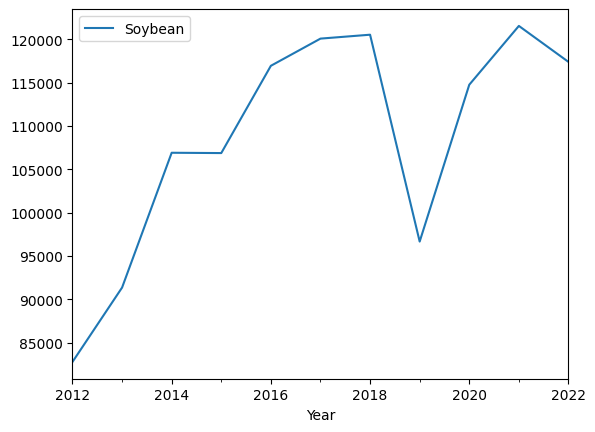

In [57]:
crop_name = "Soybean"
fig1 = filtered_df.plot.line(x= "Year", y= crop_name)
fig1